# Progress Report - Team Outliers

## Project Title - Gross Domestic Product and Economic Status of Countries

### Team Members - 
1. Advait Pai - apai21@uic.edu
2. Divyasha Pahuja - dpahuj2@uic.edu
3. Uday Nair - unair2@uic.edu
4. Utsav Sharma - usharm4@uic.edu

## Any Changes

1. For Hypothesis 1, we decided to drop 1 feature i.e. Government Spending (discussed below), because on collating it with other leading and lagging factors, it was leading to major data loss. So, we decided to drop the factor and test other factors for their importance in GDP calculation.

2. In Hypothesis 3 and 4, we have decided to change our course to classification and clustering of countries according to their income group instead of their development status. This change was made because of a lack of the label dataset for Developed, Under-developed and Emerging economies. 
Also, on researching about classifying countries based on their economic status, we that a better indicator of a country's economic status is it's income group which can be identified from the country's Gross National Income (GNI). The GNI depends on the GDP of a country, hence allowing us to build on our Hypothesis 1.

## Data

We are using data from the Organisation for Economic Co-operation and Development (OECD) and World Bank for different countries to carry out our predictions. The csv data is freely available on the website, which we have programmatically fetched these datasets from the website. This is done using a `driver.ipynb` notebook, which downloads the files and places them in a folder called `/data`.
These files are downloaded as CSVs from the website, and then are cleaned using the steps shown later in the document.

Our data is split across a number of datasets:


| Sr.no | Dataset | Description | Rows | Columns |
|-------|---------|-------------|------|---------|
| 1 | Share Prices | Share price indices are calculated from the prices of common shares of companies traded on national or foreign stock exchanges. | 35098 | 8 |
| 2 | Consumer Price Index | Inflation measured by consumer price index (CPI) is defined as the change in the prices of a basket of goods and services that are typically purchased by specific groups of households.| 293811 | 8 |
| 3 | Long Term Interest Rates | Long-term interest rates refer to government bonds maturing in ten years. Rates are mainly determined by the price charged by the lender, the risk from the borrower and the fall in the capital value. | 27365 | 8 |
| 4 | Labour Force | The labour force, or currently active population, comprises all persons who fulfil the requirements for inclusion among the employed (civilian employment plus the armed forces) or the unemployed. | 33517 | 8 |
| 5 | Exports and Imports | Defined as the transactions in goods and services between residents and non-residents. It is measured in million USD at 2015 constant prices. | 15922 | 8 |
| 6 | Household Spending | Household spending is the amount of final consumption expenditure made by resident households to meet their everyday needs, such as food, clothing, housing (rent), energy, transport, health costs, leisure.​ | 8862 | 8
| 7 | Government Spending | General government spending provides an indication of the size of government across countries. The large variation in this indicator highlights the variety of countries' approaches to delivering public goods and services and providing social protection, not necessarily differences in resources spent.​ | 10290 | 8 | 
| 8 | Tax Revenue | Tax revenue is defined as the revenues collected from taxes on income and profits, social security contributions, taxes levied on goods and services, payroll taxes, taxes on the ownership and transfer of property, and other tax. | 3549 | 8 |
| 9 | Investment GFCF | Gross fixed capital formation (GFCF), also called "investment", is defined as the acquisition of produced assets (including purchases of second-hand assets), including the production of such assets by producers for their own use, minus disposals. | 24513 | 8 |
| 10 | GDP | Gross domestic product (GDP) is the standard measure of the value added created through the production of goods and services in a country during a certain period. As such, it also measures the income earned from that production, or the total amount spent on final goods and services (less imports). | 5162 | 8 |
| 11 | Economic Category | This dataset contains the labels for the economic status of a country, which we will be using to perform classification. | 239 | 37 |
| 12 | Net Primary Income from Aborad | Net primary income includes the net labor income and net property and entrepreneurial income components of the SNA. Labor income covers compensation of employees paid to nonresident workers. Property and entrepreneurial income covers investment income from the ownership of foreign financial claims (interest, dividends, rent, etc.) and nonfinancial property income (patents, copyrights, etc.). | 266 | 63 |

The datasets `Share Prices`, `Consumer Price Index`, `Long Term Interest Rates`, `Labour Force`, `Exports and Imports`, `Household Spending`, `Government Spending`, `Tax Revenue` and `Investment GFCF` are indicators for `GDP`. The data from these datasets will be used to predict our target value of `GDP`.

The datatsets `GDP`,`Net Primary Income from Aborad ` are indicators of the GNI of a country, which helps us classify the the countries into Income Classes (`Economic Category`).

## Research Questions

1. Considering we predict the Gross Domestic Product(GDP) of countries by using leading and lagging factors such as inflation, household spending, trade, tax revenue, etc. from Organization for Economic Co-operation and Development(OECD) datasets, what factors are of more importance from these leading and lagging factors?
2. Using the historical data of Gross Domestic Product(GDP) of countries, what will be the forecast of the GDP for 5 years for the top 10 countries?  
3. Can the economic and social indicators of GDP be used to classify countries as per their income classes (Lower, Lower Middle, Upper Middle and High)?
4. What are the optimal number of income groups to divide the countries into, based on the econmic and social indicators of GDP? Does the optimal number correlate with the current World Bank classifications?

## Data Cleaning

### Step by Step Cleaning

Below our the links to the individual notebooks cleaned:

1. Advait Pai -
<br> &nbsp; a) Inflation_CPI - https://github.com/advaitpai/CS418_Project-GDP/blob/main/cleaning/inflation_cpi_cleaning.ipynb
<br> &nbsp; b) Share_Price - https://github.com/advaitpai/CS418_Project-GDP/blob/main/cleaning/share_prices_cleaning.ipynb
<br> &nbsp; c) Economic Category (Income Group Labels) - https://github.com/advaitpai/CS418_Project-GDP/blob/main/cleaning/economic_category_cleaning.ipynb

2. Divyasha Pahuja - 
<br> &nbsp; a) Labour Force - https://github.com/advaitpai/CS418_Project-GDP/blob/main/cleaning/Labour_Force_cleaning.ipynb
<br> &nbsp; b) Long Term Interest Rate - https://github.com/advaitpai/CS418_Project-GDP/blob/main/cleaning/long_term_ir_cleaning.ipynb
<br> &nbsp; c) Net foreign factor income - https://github.com/advaitpai/CS418_Project-GDP/blob/main/cleaning/foreign_income_cleaning.ipynb
3. Uday Nair - 
4. Utsav Sharma
<br> &nbsp; a) GDP_Yearly - https://github.com/advaitpai/CS418_Project-GDP/blob/main/cleaning/gdp_yearly_cleaning.ipynb
<br> &nbsp; b) Government Spending - https://github.com/advaitpai/CS418_Project-GDP/blob/main/cleaning/government_spend_cleaning.ipynb
<br> &nbsp; c) Investment GFCF - https://github.com/advaitpai/CS418_Project-GDP/blob/main/cleaning/investment_gfcf_cleaning.ipynb
<br> &nbsp; d) Tax Revenue - https://github.com/advaitpai/CS418_Project-GDP/blob/main/cleaning/tax_revenue_cleaning.ipynb

### GDP Yearly:

To clean this dataset, we load the CSV file from the `data/uncleaned` directory, and check the head to ensure that it loads properly. The initial shape of the dataframe is `(5222,8)` 

Then, we check the unique values in the column `MEASURE`. This tells us that this column has the values `MLN_USD` and `USD_CAP`.
We also check for the columns `FREQUENCY` and `SUBJECT`, where the unique values are `A` and `TOT` respectively.

The column `Flag_Codes` is of no use to us, so we drop it. For `MEASURE`, we keep the values with `MLN_USD` only.

Before we drop any columns, we need to check the number of unique values per column. From this, the columns `INDICATOR`,`SUBJECT`,`FREQUENCY` and `MEASURE` can be dropped now since they have only 1 value in them and do not add any information.

Now, we can check the `null` values for all columns. The dataset that we have no `null` values, so we do not need to handle this.

After our cleaning, the shape of a dataframe is `(2675,3)`, which is then exported to a .csv file and placed in the `data/temp` folder.

#### Original Data Sizes

In [1]:
import pandas as pd
base_path = '../data/uncleaned/'
print('Original Dataset Shapes:-\n')


# 1. Share Prices Data
df_sp_uc = pd.read_csv(base_path+'share_prices.csv')
print("Share Prices Shape:",df_sp_uc.shape)
# 2. Inflation CPI Data
df_cpi_uc = pd.read_csv(base_path+'inflation_cpi.csv')
print("Inflation CPI Spend Shape:",df_cpi_uc.shape)
# 3. Long Term Interest Rates
df_lti_uc = pd.read_csv(base_path+'long_term_ir.csv')
print("Long Term Interest Rates Shape:",df_lti_uc.shape)
# 4. Labour Force Date
df_lf_uc = pd.read_csv(base_path+'labour_force.csv')
print("Labour Force Shape:",df_lf_uc.shape)
# 5. Trade in Government Spend Data
df_exp_imp_uc = pd.read_csv(base_path+'trade_in_gs.csv')
print("Trade in Government Spend Shape:",df_exp_imp_uc.shape)
# 6. Household Spend
df_hspend_uc = pd.read_csv(base_path+'household_spend.csv')
print("Household Spend Shape:",df_hspend_uc.shape)
# 7. Government Spending
df_gspend_uc = pd.read_csv(base_path+'government_spend.csv')
print("Gov Spend Shape:",df_gspend_uc.shape)
# 8. Tax Revenue
df_tax_uc = pd.read_csv(base_path+'tax_revenue.csv')
print("Tax Revenue Shape:",df_tax_uc.shape)
# 9. Investment GCFC
df_gfcf_uc = pd.read_csv(base_path+'investment_gfcf.csv')
print("Investment GCFC Shape:",df_gfcf_uc.shape)
# 10. GDP Yearly Data
df_gdp_uc = pd.read_csv(base_path+'gdp_yearly.csv')
print("GDP Yearly Shape:",df_gdp_uc.shape)
# 11. FDI Data
# df_fdi_in_uc = pd.read_csv(base_path+'FDI_inflow.csv')
df_fi_uc_shape = (266*62,3)
print("Foreign Income Shape:", df_fi_uc_shape)
# df_fdi_out_uc = pd.read_csv(base_path+'foreign_income.csv')
# 12. GNI Data
# df_gni = pd.read_csv(base_path+'economic_category.csv')
df_gni_uc_shape = (218*35,3)
print("GNI Yearly Shape:", df_gni_uc_shape)

Original Dataset Shapes:-

Share Prices Shape: (35144, 8)
Inflation CPI Spend Shape: (294281, 8)
Long Term Interest Rates Shape: (27439, 8)
Labour Force Shape: (33714, 8)
Trade in Government Spend Shape: (16103, 8)
Household Spend Shape: (8938, 8)
Gov Spend Shape: (10466, 8)
Tax Revenue Shape: (3549, 8)
Investment GCFC Shape: (24597, 8)
GDP Yearly Shape: (5222, 8)
Foreign Income Shape: (16492, 3)
GNI Yearly Shape: (7630, 3)


#### Final Sizes

In [2]:
import pandas as pd
base_path = '../data/temp/'
print('Final Dataset Shapes:-\n')
# 1. Share Prices Data
df_sp = pd.read_csv(base_path+'share_prices_cleaned.csv')
print("Share Prices Shape:",df_sp.shape)
# 2. Inflation CPI Data
df_cpi = pd.read_csv(base_path+'inflation_cpi_cleaned.csv')
print("Inflation CPI Spend Shape:",df_cpi.shape)
# 3. Long Term Interest Rates
df_lti = pd.read_csv(base_path+'long_term_ir_cleaned.csv')
print("Long Term Interest Rates Shape:",df_lti.shape)
# 4. Labour Force Date
df_lf = pd.read_csv(base_path+'labour_force_cleaned.csv')
print("Labour Force Shape:",df_lf.shape)
# 5. Trade in Government Spend Data
df_exp_imp = pd.read_csv(base_path+'trade_in_gs_cleaned.csv')
print("Trade in Government Spend Shape:",df_exp_imp.shape)
# 6. Household Spend
df_hspend = pd.read_csv(base_path+'household_spend_cleaned.csv')
print("Household Spend Shape:",df_hspend.shape)
# 7. Government Spending
df_gspend = pd.read_csv(base_path+'government_spend_cleaned.csv')
print("Gov Spend Shape:",df_gspend.shape)
# 8. Tax Revenue
df_tax = pd.read_csv(base_path+'tax_revenue_cleaned.csv')
print("Tax Revenue Shape:",df_tax.shape)
# 9. Investment GCFC
df_gfcf = pd.read_csv(base_path+'investment_gfcf_cleaned.csv')
print("Investment GCFC Shape:",df_gfcf.shape)
# 10. GDP Yearly Data
df_gdp = pd.read_csv(base_path+'gdp_yearly_cleaned.csv')
print("GDP Yearly Shape:",df_gdp.shape)
# 11. FDI Data
df_fi = pd.read_csv(base_path+'foreign_income_cleaned.csv')
print("Net Foreign Income Shape:",df_fi.shape)
# 12. GNI Data
df_gni = pd.read_csv(base_path+'economic_category_cleaned.csv')
print("GNI Yearly Shape:",df_gni.shape)

Final Dataset Shapes:-

Share Prices Shape: (2065, 3)
Inflation CPI Spend Shape: (2840, 3)
Long Term Interest Rates Shape: (1587, 3)
Labour Force Shape: (1993, 3)
Trade in Government Spend Shape: (2641, 3)
Household Spend Shape: (1955, 3)
Gov Spend Shape: (654, 3)
Tax Revenue Shape: (1697, 3)
Investment GCFC Shape: (2635, 3)
GDP Yearly Shape: (2675, 3)
Net Foreign Income Shape: (9063, 3)
GNI Yearly Shape: (7161, 3)


In [3]:
def DataLoss(uncl, cl):
    x = uncl[0] - cl[0]
    y = uncl[1] - cl[1]
    return (x,y)

### Data loss for each table

In [4]:
print("Data loss for each table:-\n")
# 1. Share Prices Data
print("Share Prices Data Loss:",DataLoss(df_sp_uc.shape , df_sp.shape))
# 2. Inflation CPI Data
print("Inflation CPI Spend Data Loss:",DataLoss(df_cpi_uc.shape , df_cpi.shape))
# 3. Long Term Interest Rates
print("Long Term Interest Rates Data Loss:",DataLoss(df_lti_uc.shape , df_lti.shape))
# 4. Labour Force Date
print("Labour Force Data Loss:", DataLoss(df_lf_uc.shape , df_lf.shape))
# 5. Trade in Government Spend Data
print("Trade in Government Spend Data Loss:",DataLoss(df_exp_imp_uc.shape , df_exp_imp.shape))
# 6. Household Spend
print("Household Spend Data Loss:",DataLoss(df_hspend_uc.shape , df_hspend.shape))
# 7. Government Spending
print("Gov Spend Data Loss:",DataLoss(df_gspend_uc.shape , df_gspend.shape))
# 8. Tax Revenue
print("Tax Revenue Data Loss:",DataLoss(df_tax_uc.shape , df_tax.shape))
# 9. Investment GCFC
print("Investment GCFC Data Loss:",DataLoss(df_gfcf_uc.shape , df_gfcf.shape))
# 10. GDP Yearly Data
print("GDP Yearly Data Loss:",DataLoss(df_gdp_uc.shape ,  df_gdp.shape))
# 11. FDI Data
print("Foreign Income Data Loss:", DataLoss(df_fi_uc_shape , df_fi.shape))
# 12. GNI Data
print("GNI Yearly Data Loss:", DataLoss(df_gni_uc_shape , df_gni.shape))

Data loss for each table:-

Share Prices Data Loss: (33079, 5)
Inflation CPI Spend Data Loss: (291441, 5)
Long Term Interest Rates Data Loss: (25852, 5)
Labour Force Data Loss: (31721, 5)
Trade in Government Spend Data Loss: (13462, 5)
Household Spend Data Loss: (6983, 5)
Gov Spend Data Loss: (9812, 5)
Tax Revenue Data Loss: (1852, 5)
Investment GCFC Data Loss: (21962, 5)
GDP Yearly Data Loss: (2547, 5)
Foreign Income Data Loss: (7429, 0)
GNI Yearly Data Loss: (469, 0)


### Discussion on Data Loss

Most of the data loss that occurs between the raw dataset that we found from the online resources and the cleaned dataset that we created individually is due to us selecting particular parameters for ['MEASURE','SUBJECT','FREQUENCY']. In all of the datasets, we have chosen 'SUBJECT' == 'TOT', 'FREQUENCY' == 'A' and 'MEASURE' depends on the quantative value from each dataset we are trying to extract.

For the last two datasets, the data loss occurs due to existence on NaN values.

In [5]:
## Renaming Columns

df_sp = df_sp.rename(columns={'Value':'Share_Price'})
df_cpi = df_cpi.rename(columns={'Value':'Inflation_CPI'})
df_lti = df_lti.rename(columns={'Value':'LT_Interest'})
df_lf = df_lf.rename(columns={'Value':'Labor_Force'})
df_exp_imp = df_exp_imp.rename(columns={'NTRVAL':'Trade_Goverment'})
df_hspend = df_hspend.rename(columns={'Value':'H_Spend'})
df_gspend = df_gspend.rename(columns={'Value':'G_Spend'})
df_tax = df_tax.rename(columns={'Value':'Tax'})
df_gfcf = df_gfcf.rename(columns={'Value':'Investment'})
df_gdp = df_gdp.rename(columns={'Value':'GDP'})
df_gni = df_gni.rename(columns={'Value':'GNI'})
df_fi = df_fi.rename(columns={'Value':'Foreign_Income'})

In [6]:
df_sp.head()

,LOCATION,TIME,Share_Price
0,AUS,1958,2.613002
1,AUS,1959,3.256618
2,AUS,1960,3.966841
3,AUS,1961,3.653984
4,AUS,1962,3.678260


In [7]:
df_cpi.head()

,LOCATION,TIME,Inflation_CPI
0,AUS,1949,3.738101
1,AUS,1950,4.063153
2,AUS,1951,4.852566
3,AUS,1952,5.688414
4,AUS,1953,5.943812


In [8]:
df_lti.head()

,LOCATION,TIME,LT_Interest
0,PRT,1994,10.478330
1,PRT,1995,11.465000
2,PRT,1996,8.559167
3,PRT,1997,6.358333
4,PRT,1998,4.877500


In [9]:
df_lf.head()

,LOCATION,TIME,Labor_Force
0,MEX,2005,43631.50
1,MEX,2006,44982.52
2,MEX,2007,45904.54
3,MEX,2008,46769.21
4,MEX,2009,48018.36


In [10]:
df_exp_imp.head()

,LOCATION,TIME,Trade_Goverment
0,AUS,1959,1221.210
1,AUS,1960,467.848
2,AUS,1961,3915.866
3,AUS,1962,1787.544
4,AUS,1963,2725.988


In [11]:
df_hspend.head()

,LOCATION,TIME,H_Spend
0,AUS,1970,30476.510257
1,AUS,1971,32799.844017
2,AUS,1972,35590.183565
3,AUS,1973,41114.456624
4,AUS,1974,48461.851872


In [12]:
df_gspend.head()

,LOCATION,TIME,G_Spend
0,AUS,2007,13737.93
1,AUS,2008,14835.57
2,AUS,2009,15963.85
3,AUS,2010,15802.56
4,AUS,2011,16535.76


In [13]:
df_tax.head()

,LOCATION,TIME,Tax
0,AUS,1965,5.608
1,AUS,1966,5.996
2,AUS,1967,6.631
3,AUS,1968,7.405
4,AUS,1969,8.488


In [14]:
df_gfcf.head()

,LOCATION,TIME,Investment
0,AUS,1960,7594.023
1,AUS,1961,7555.709
2,AUS,1962,8263.204
3,AUS,1963,9144.787
4,AUS,1964,10182.874


In [15]:
df_gdp.head()

,LOCATION,TIME,GDP
0,AUS,1960,25071.833
1,AUS,1961,25363.455
2,AUS,1962,27953.904
3,AUS,1963,30431.547
4,AUS,1964,32742.466


In [16]:
df_gni = df_gni.dropna()
df_gni.head()

,LOCATION,TIME,GNI
0,AFG,1987,L
1,DZA,1987,UM
2,ASM,1987,H
3,ATG,1987,UM
4,ARG,1987,UM


### Dropping table of df_gspend

While government spending is an important factor that contributes to the GDP of a country, the data that we have available is only from 2007 onwards for most countries.
Because of this, the table has only 654 rows of data, and including this dataset in our project would result in massive data loss, leaving all our models with too little data to be accurate. As we can see below, including the government spending dataset results in a data loss of 3128 rows, and leaves us with just 491 records.
Therefore, we have taken a decision to drop this dataset from this project and proceed with the other factors that we have.

In [17]:
dfs = [df_lti,df_lf,df_exp_imp,df_hspend,df_tax,df_gspend,df_gfcf,df_gdp]
df_temp_gdp = pd.merge(df_sp,df_cpi,how='outer',on=['LOCATION','TIME'])
for d in dfs:
    df_temp_gdp = pd.merge(df_temp_gdp,d,how='outer',on=['LOCATION','TIME'])
df_gdp_temp_before = df_temp_gdp.shape
print("Shape of GDP Dataset Before Cleaning:",df_gdp_temp_before)
df_temp_gdp = df_temp_gdp.dropna()
# df_temp_gdp = df_temp_gdp.drop(columns=['LOCATION','TIME','H_Spend',"Investment","Trade_Goverment"])
df_temp_gdp = df_temp_gdp.drop(columns=['LOCATION','TIME']).reset_index(drop=True)
print("Shape of GDP Dataset After Cleaning:",df_temp_gdp.shape)
print("Data Loss:", DataLoss(df_gdp_temp_before, df_temp_gdp.shape))

Shape of GDP Dataset Before Cleaning: (3619, 12)
Shape of GDP Dataset After Cleaning: (491, 10)
Data Loss: (3128, 2)


## Exploratory Data Analysis & Visualisation of EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. GDP Dataset Regression Model

We now merge the datasets using an outer join on the columns `LOCATION` and `TIME`. Since each row would have year-wise data, and the features would change based on the year, the null values cannot be imputed using a mean along the columns of the dataset. We therefore drop the rows that have null values in them and analyze the data with the remaining rows.

In [19]:
dfs = [df_lti,df_lf,df_exp_imp,df_hspend,df_tax,df_gfcf,df_gdp]
df_merge_gdp = pd.merge(df_sp,df_cpi,how='outer',on=['LOCATION','TIME'])
for d in dfs:
    df_merge_gdp = pd.merge(df_merge_gdp,d,how='outer',on=['LOCATION','TIME'])
df_gdp_shape_before = df_merge_gdp.shape
print("Shape of GDP Dataset Before Cleaning:",df_gdp_shape_before)
print('Columns of GDP:',df_merge_gdp.columns)


Shape of GDP Dataset Before Cleaning: (3603, 11)
Columns of GDP: Index(['LOCATION', 'TIME', 'Share_Price', 'Inflation_CPI', 'LT_Interest',
       'Labor_Force', 'Trade_Goverment', 'H_Spend', 'Tax', 'Investment',
       'GDP'],
      dtype='object')


In [20]:
## GDP Dataset Information before cleaning
df_merge_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3603 entries, 0 to 3602
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LOCATION         3603 non-null   object 
 1   TIME             3603 non-null   int64  
 2   Share_Price      2065 non-null   float64
 3   Inflation_CPI    2840 non-null   float64
 4   LT_Interest      1587 non-null   float64
 5   Labor_Force      1993 non-null   float64
 6   Trade_Goverment  2641 non-null   float64
 7   H_Spend          1955 non-null   float64
 8   Tax              1697 non-null   float64
 9   Investment       2635 non-null   float64
 10  GDP              2675 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 337.8+ KB


In [21]:
df_merge_gdp = df_merge_gdp.dropna()
df_merge_gdp = df_merge_gdp.drop(columns=['LOCATION','TIME']).reset_index(drop=True)
print('Shape of the GDP Dataset after cleaning:',df_merge_gdp.shape)
print("Data Loss:", DataLoss(df_gdp_shape_before, df_merge_gdp.shape))

Shape of the GDP Dataset after cleaning: (1065, 9)
Data Loss: (2538, 2)


Here we see that there is a data loss of 2538 entries when we merge the tables, this happens due to NaN values obtained during an outer merge. We have no other alternative but to drop these values as we cannot fill NaN values with mean of the respective columns. Replacing the NaN values with the mean would be incorrect as the data changes based on country and year, thus for any particular country and year the mean of the entire column (factor) is not the representative value. 

We build a histogram for each of the columns in the dataset to get a better understanding of the data. 

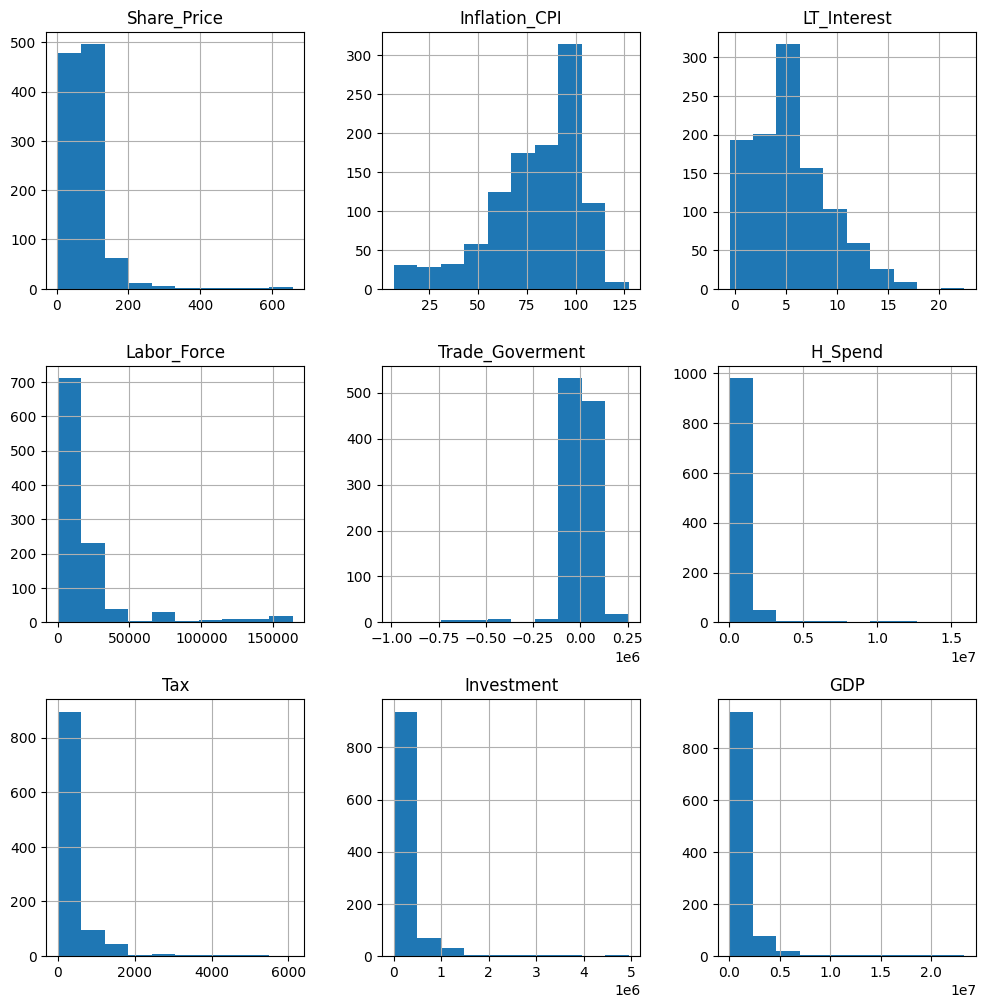

In [22]:
df_merge_gdp.hist(figsize=(12,12)) 
plt.show()

We generate a histogram for each column in the dataset to see the distribution of the data.
The y axis represents the number of observations of all countries in the dataset, and the x axis represents the bins for the value of the features.  

The histograms above show us the distribution of `GDP` as well as other factors of countries. We observe that the distribution for most factors is skewed to the left which means that the values for most of the countries is concentrated in the lower range. Majority of our observations are in the lower spectrum and fewer countries have high values for any feature.   
Two exceptions to this are the histograms for `Trade_Government` and `Inflation`.  
* The histogram for `Trade_Government` shows that the distribution is skewed to the right which means that the values for most of the countries is concentrated in the higher range. Majority of our observations are in the higher spectrum and fewer countries have low values for this feature. This is because the trade by countries  is a negative value which means that governments are importing more than exporting.
* The histogram for `Inflation` shows that the distribution is skewed to the right which means that the values for most of the countries is concentrated in the higher range. Majority of our observations are in the higher spectrum and fewer countries have low values for this feature. This is because the inflation rate is a positive value which means that the prices of goods and services are increasing.  

In [23]:
## GDP Dataset Description after cleaning
df_merge_gdp.describe()

,Share_Price,Inflation_CPI,LT_Interest,Labor_Force,Trade_Goverment,H_Spend,Tax,Investment,GDP
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1.065000e+03,1065.000000,1.065000e+03,1.065000e+03
mean,78.145746,79.698521,5.430886,17982.273092,-1650.701272,6.674355e+05,356.503445,2.579701e+05,1.164511e+06
std,64.346393,23.822362,3.689449,29515.416510,95927.985079,1.665916e+06,677.455490,5.368084e+05,2.524961e+06
min,3.054441,6.700533,-0.523833,145.400000,-988060.724000,3.156788e+03,1.767000,1.118213e+03,6.268439e+03
25%,33.733540,66.444680,2.754167,2721.400000,-3546.129000,8.004702e+04,50.173000,3.543663e+04,1.647204e+05
50%,75.870530,84.038980,4.894242,5297.725000,4987.949000,1.741438e+05,115.411000,8.127168e+04,3.442944e+05
75%,101.283400,99.601300,7.611667,23348.500000,21292.141000,6.127016e+05,354.407000,2.483558e+05,1.143106e+06
max,657.822300,127.189200,22.497500,163538.700000,255017.100000,1.590258e+07,6112.256000,4.939579e+06,2.331508e+07


In [24]:
## GDP Dataset Information after cleaning
df_merge_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Share_Price      1065 non-null   float64
 1   Inflation_CPI    1065 non-null   float64
 2   LT_Interest      1065 non-null   float64
 3   Labor_Force      1065 non-null   float64
 4   Trade_Goverment  1065 non-null   float64
 5   H_Spend          1065 non-null   float64
 6   Tax              1065 non-null   float64
 7   Investment       1065 non-null   float64
 8   GDP              1065 non-null   float64
dtypes: float64(9)
memory usage: 75.0 KB


On dropping the null values, we are left with 1065 rows of data. We then visualize this data using a heatmap to see the correlation between the features and the target variable. 

We visualize the data within the cleaned and merged dataset for GDP by using a correlation matrix for the same.
The correlation matrix displays the correlation coefficients between every pair of variables in our dataset and tells us the direction of the linear relation between the 2 variables. We then use a heatmap to visualize the correlation matrix with color coding. The darker the color, the higher the correlation coefficient between the 2 variables. The lighter the color, the lower the correlation coefficient between the 2 variables.

<Axes: >

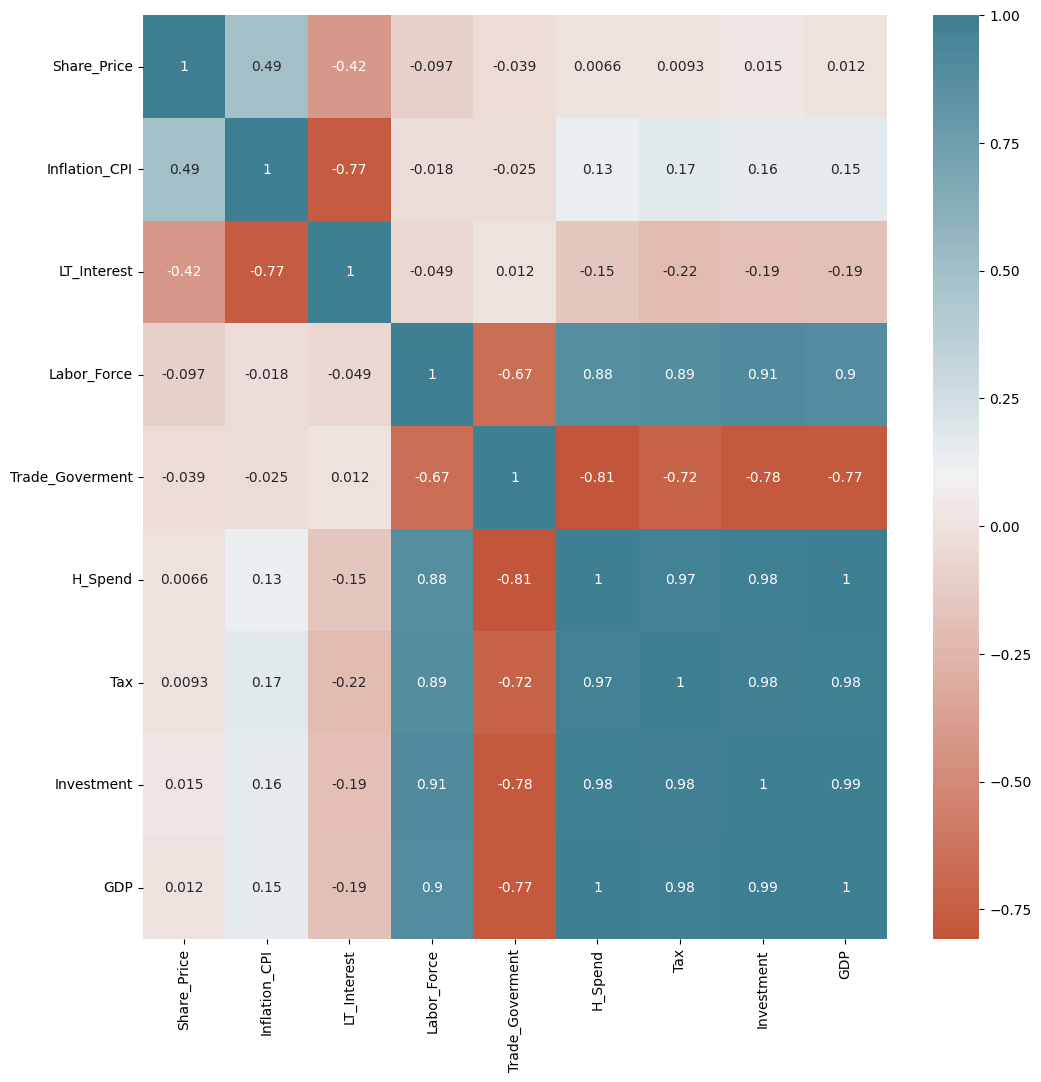

In [25]:
# Correlation Matrix Visualization 
plt.figure(figsize=(12,12))
#plot heat map
sns.heatmap(df_merge_gdp.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200))

For our dataset we observe that the GDP of a country is highly correlated with the following factors:
1. Household Spending
2. Tax Revenue
3. Investment GFCF
4. Labour Force

We also observe that the GDP of a country is highly negatively correlated with the Net Trade by the Government. 
All other factors have a correlation coefficient of lesser significance +0.5/-0.5 with the GDP of countries.



### 2. Time Series Analysis of GDP Data

(522, 3)


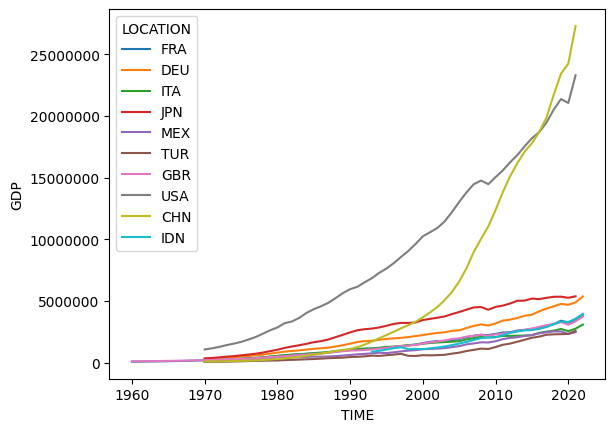

In [26]:
df_gdp['LOCATION']= df_gdp['LOCATION'].astype('string')
top10 = df_gdp[df_gdp['TIME']==2021].sort_values(by='GDP', ascending=False)
top10 = top10[top10['LOCATION'].apply(lambda x: len(x) < 4)].reset_index(drop=True)
top10 = top10[:10]
df = df_gdp[df_gdp['LOCATION'].isin(top10['LOCATION'])].reset_index(drop=True)
sns.lineplot(x='TIME', y='GDP', hue='LOCATION', data=df)
plt.ticklabel_format(style='plain', axis='y')
print(df.shape)

For the above EDA, we take the top 10 countries by GDP for 2021 from the `df_gdp` dataframe.
While we do have data from 2022 for a few countries, a lot of the other countries do not seem to have reported their GDP for 2022 to the OECD yet, which is why their data is not available for that year. Also, the dataset does not contain data for a few countries such as India and Brazil, which we know have high GDP, but have not reported their data to the OECD. Therefore, we are only working with the data that we have available.
To do this, we first ensure that our `LOCATION` column is a string, and then take the rows where the `TIME` column is 2021. We sort these values in descending order of `GDP` and then take only those columns where the `LOCATION` column has 3 characters. This is because the dataset also contains GDP information for groups of countries which we do not need.

We then take the top 10 results from this filtered dataset, and keep only those values in `df_gdp` whose `LOCATION` also exists in the `top10` dataframe.
Finally, we create a plot of these top 10 countried to analyse the resulting plot that we get.

From the chart, we can see that all the GDPs of the countries have an upward trend with respect to the years, with USA and China having the astronomical growth that we see. We can also see the effects of world event such as the recession of 2008 which causes a dip in the GDP of almost all countries except China, and the COVID-19 Pandemic of 2019 which also manifests as the drop in GDP that we see in that year.

We can also see that on the low end, almost all countries have data available from 1970 onwards with the exception of Great Britain, which has data available from 1960. On the higher end of the years, a lot of the countries have data available till 2021, with only a few countries reporting data till 2022.
Keeping the top 10 contries gives us 522 rows of data, which we can use along with other factors that we will include in our ARIMA model for answering hypothesis 2.

### 3. Gross Nation Income Label EDA

#### Bar Plot for country-wise distribution

We now want to analyse the distribution of countries in their resepctive income groups over the years. We plot a histogram with a interval of 5 years to see how the data is modified. Now we will plot the yearwise count for ['H','UM','LM','L'] to further analyse the country.

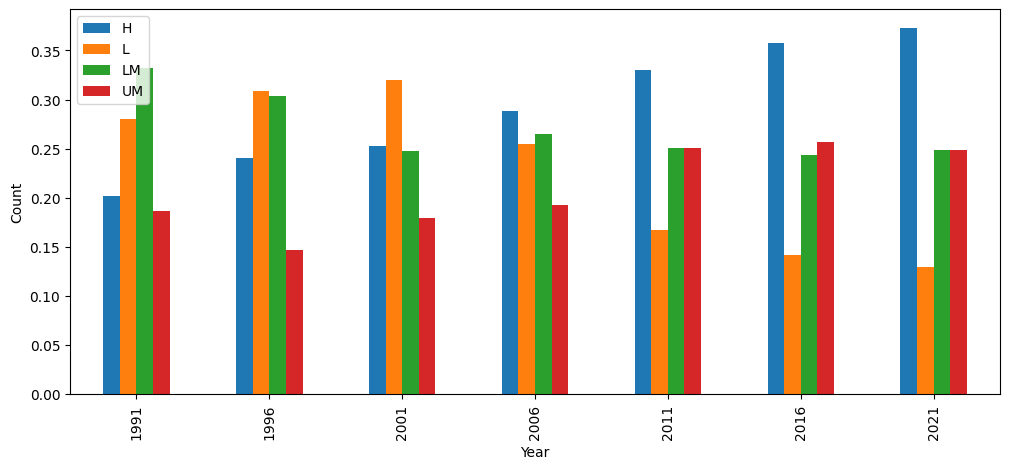

In [27]:
import numpy as np
df_cat_counts = df_gni['TIME'].groupby([df_gni['TIME'],df_gni['GNI']]).agg('count')
df_cat_counts = df_cat_counts.unstack(level=-1)
df_cat_counts = df_cat_counts.reset_index()
## Normalising the data on the sum
df_cat_counts[['H','L','LM','UM']] = df_cat_counts[['H','L','LM','UM']].div(df_cat_counts[['H','L','LM','UM']].sum(axis=1), axis=0)
min_y = min(df_cat_counts['TIME'].unique())
max_y = max(df_cat_counts['TIME'].unique())
df_plot = df_cat_counts.loc[df_cat_counts['TIME'].isin([x for x in range(max_y,min_y,-5)])]
df_plot.plot(x="TIME", y=["H", "L","LM","UM"], kind="bar",figsize=(12,5))

plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#### Trend Analysis

We do the trend analysis after normalising the data with the number of countries for which we have the data instead of using absolute values to plot the bar chart.

1. High Income Group (H): From 1991 - 2021, we observe that the number of countries in the High Income group are continously increasing implying that the generally most countries are economically progressing.
2. Upper - Middle Income Group (UM): From 1991 - 2016 we observe that trend is generally increasing, except in 2021 we see that some of the countries leave the UM group, but since the H group is increasing it means these most countries have moved from UM to H.
3. Lower - Middle Income Group (LM): From 1991 - 2016, we observe a declining trend in the LM group, which correlates to the increase in the UM group as well. In 2021 we see that LM countries .
4. Lower Income group (L): From 1991-2001, we observe a slight increase in the proportion in the number of low countries. This is not due to countries losing their GNI values, but because more countries begin to report their data between 1991-2001, this can be viewed in the economic_category_cleaning.ipynb notebook as well. Post 2001 we see a steady decline in the number of (L) countries which correlates to the increase in the the other categories 

In [28]:
dfs = [df_lti,df_lf,df_exp_imp,df_hspend,df_tax,df_gfcf,df_gni]
df_merge_gni_1 = pd.merge(df_sp,df_cpi,how='outer',on=['LOCATION','TIME'])
for d in dfs:
    df_merge_gni_1 = pd.merge(df_merge_gni_1,d,how='outer',on=['LOCATION','TIME'])
df_gni_1_shape_before = df_merge_gni_1.shape
print("Shape of GNI Dataset Before Cleaning:",df_gni_1_shape_before)
df_merge_gni_1 = df_merge_gni_1.dropna()
# df_merge_gni_1 = df_merge_gni_1.drop(columns=['LOCATION','TIME','H_Spend',"Investment","Trade_Goverment"])
df_merge_gni_1 = df_merge_gni_1.drop(columns=['LOCATION','TIME']).reset_index(drop=True)
print("Shape of GNI Dataset:",df_merge_gni_1.shape)
print("Data Loss:", DataLoss(df_gni_1_shape_before, df_merge_gni_1.shape))
# df_merge_gni_1.head()

Shape of GNI Dataset Before Cleaning: (8829, 11)
Shape of GNI Dataset: (943, 9)
Data Loss: (7886, 2)


#### Categorical Data Description

In [29]:
# Categorical Data Description
df_merge_gni_1['GNI'].value_counts()

H     881
UM     61
LM      1
Name: GNI, dtype: int64

The initial dataset of GNI consists of an 'L' label which is completely missing in the final dataset after merge and data is completely skewed. In the next section, we propose an alternative dataset consisting of only GDP's yearly values and Foreign Income as a dataset for Hypothesis 3 & Hypothesis 4

### 4. Optimal k for Clustering EDA

#### Creating an alternative dataset

This dataset is used creating only two features i.e. Foreign Income and GDP, instead of GDP's factors, and the label containing column is GNI. For Hypothesis 3, i.e. classification, this label column will be used for training and testing, while for Hypothesis 4, this column will be dropped for training. In Hypothesis 4, we use the label column to evaluate our clustering model.

In [30]:
dfs = [df_fi,df_gdp,df_gni]
# # df_merge_gni_2 = pd.merge(df_sp,df_cpi,how='outer',on=['LOCATION','TIME'])
# for d in dfs:
#     df_merge_gni_2 = pd.merge(df_merge_gni_2,d,how='outer',on=['LOCATION','TIME'])
df_merge_gni_2 = pd.merge(df_fi,df_gdp,how='outer',on=['LOCATION','TIME'])
df_merge_gni_2 = pd.merge(df_merge_gni_2,df_gni,how='outer',on=['LOCATION','TIME'])
df_gni_2_shape_before = df_merge_gni_2.shape
print("Shape of GNI Dataset Before Cleaning:",df_gni_2_shape_before)
df_merge_gni_2 = df_merge_gni_2.dropna()
# df_merge_gni_2 = df_merge_gni_2.drop(columns=['LOCATION','TIME','H_Spend',"Investment","Trade_Goverment"])
df_merge_gni_2 = df_merge_gni_2.drop(columns=['LOCATION','TIME']).reset_index(drop=True)
print("Shape of GNI Dataset:",df_merge_gni_2.shape)
print("Data Loss:", DataLoss(df_gni_2_shape_before, df_merge_gni_2.shape))
df_merge_gni_2.head()

Shape of GNI Dataset Before Cleaning: (10288, 5)
Shape of GNI Dataset: (1740, 3)
Data Loss: (8548, 2)


,Foreign_Income,GDP,GNI
0,-3.437004e+09,261085.322,H
1,-2.889965e+08,119629.722,H
2,8.760346e+08,149338.723,H
3,-1.335219e+10,469040.522,H
4,-1.751967e+09,45241.807,LM


We will now see how many different labels (or clusters) can be seen on the new dataset of GNI

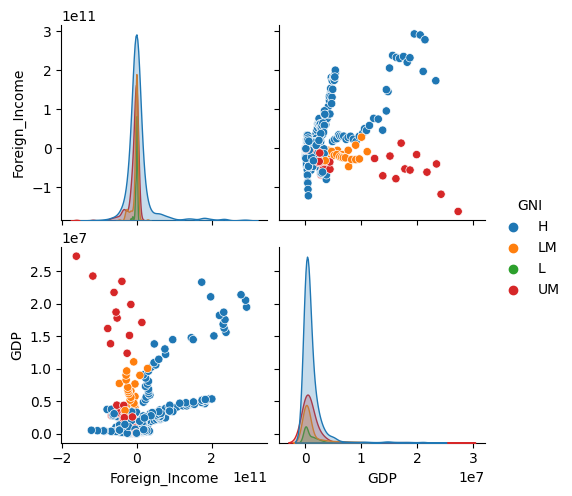

In [31]:
sns.pairplot(df_merge_gni_2, hue='GNI')
plt.show()

We can see 3 distinct labels - H, UM and L within the data. 
The density graph of the variables very less area for green i.e. the L class.

We will check how many records of each label is returned (using the GNI labels column appended), to verify this.

In [32]:
# Categorical Data Description
df_merge_gni_2['GNI'].value_counts()

H     1054
UM     390
LM     222
L       74
Name: GNI, dtype: int64

## Model Planning

### 1. Regression Models

### 2. Time Series Analysis Models

### 3. Classification Models

### 4. Clustering Models

For the Research Question 4, we are planning to use the following three models on the GNI dataset:

1. 𝑘-Means
2. DBSCAN
3. Gaussian Mixture Model.

These models are being used for our Hypothesis to put similar data into a group. These are all clustering algorithms that create smaller groups within the data for the records that are highly correlated to each other. The approach for clustering is simple: similar means that there is a short distance between objects in the feature space. There are different ways to measure distances, as any well-defined metric can be used.
Thus, we just have objects and a clustering algorithm that determines groups of related objects as result. 
These algorithms will help us determine the appropriate number of Income groups that the data should be divided into.

#### K-Means -

**Pros:** 
1. It is the quickest algorithm of all three, as it is less complex
2. It works well for large datasets.
3. It reduces intra-cluster variance.

**Cons:** 
1. 𝑘-Means is sensitive to the initial clusters.
2. An unsuitable value of 𝑘 may lead to bad results.
3. 𝑘-Means is only ideal for round clusters. E.g. Half Moons are not correctly clustered by K-Means.
4. With 𝑘-Means, outliers cannot be identified.
5. All features must have a similar range of values.


#### Gaussian Mixture Model-

**Pros:** 
1. Better than 𝑘-Means, GMM is robust to outliers.
2. Provides BIC score, which is good for selecting parameters.

**Cons:** 
1. The convergence is much slower than with 𝑘-Means. 
2. It is is also sensitive to the initialization.
3. Just like K-Means, Shapes that are not ellipsoid usually cannot be clusters by GMM.

#### DBSCAN-

**Pros:** 
1. As opposed to 𝑘-Means, it is resistant to outliers.
2. It can handle clusters of different shapes and sizes.
3. Unlike 𝑘-Means, we don't have to specify the number of clusters.

**Cons:** 
1. It is difficult to find good values for 𝜖 and 𝑚𝑖𝑛𝑃𝑡𝑠.
2. It is highly sensitive to these 2 parameters - 𝜖 and 𝑚𝑖𝑛𝑃𝑡𝑠.
3. Clusters may have different densities, and DBSCAN does not work well with large variances in densities.

## Reflection

### What is the hardest part of the project that you’ve encountered so far?

The hardest part was creating the final datasets that would go into our models.
Here are a few instances that we found:
1. For our x independent variables for Hyp 1, we had to clean and collate seperate datasets for each of these into a single dataset. 
Each dataset had different measures, subjects, and frequency for each variable which required individual inspection and cleaning before collation.
2. The predictors for GNI which will be used to classify the income group of the country, were unlcear and hard to find. Moreover, the historical dataset with labels assigned to income classes of all the countries for previous years was not easily available. Once we found it, we had to unpivot the dataset to make it suitable for our classification model.

### What are your initial insights?

1. Intially for hypothesis 3, we had planned to classify countries into their respective development status such as Developed, Under-developed and Emerging. After reserarching for data sources that would help us extract these labels per country per year, we realized that there is no solid dataset present for this and a better indicator of a countries economic status is it's income class which can be identified from the country's GNI. Hence we have changed the scope of Hyp3 to classifying countries into their respective income groups. This has a two fold benefit as we were able to build a dataset as well as find a direct correlation between GDP and GNI, where GNI is used to classify the countries into their income groups, hence strengthen our research.
2. The Year range is different for each country and also varies in each feature, which on combining of datasets of all the features will leads to loss of all those samples that don't match. 
3. The Government Spending dataset did not have enough data for us to include it in our model. For most of the countires, the data was available going back till only 2007, which is insufficient for the model. Including this in our final dataframe would have resulted in too much data loss, which is why we are dropping this dataset.
4. For Hypothesis 3, The lower income group has missing data on merging the GDP independent variables and GNI factors, which indicates that countries with incomes on the lower side have lesser resources to gather such data. Which validates why data is skewed toward high income category out of the four groups. 

### Are there any concrete results you can show at this point? If not, why not?

#### Hypothesis 1: 

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error

# Extra Trees Regressor Model
model = ExtraTreesRegressor(random_state=236)
X = df_merge_gdp.drop(columns=["GDP"])
Y = df_merge_gdp['GDP'].to_numpy()
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X_norm,Y,test_size=0.3,random_state=236)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

# Model Metrics
print("R^2_Score:",r2_score(Y_test,Y_pred))
print("Mean Absolute Error:",mean_absolute_error(Y_test,Y_pred))

#Feature Importances
sum = 0
print("\nFeature Importances:")
for i in range(len(model.feature_importances_)):
    print("\t",X.columns[i]+":",model.feature_importances_[i]*100)
    sum+= model.feature_importances_[i]

print("\nSum:",sum)

R^2_Score: 0.9981114038963094
Mean Absolute Error: 26001.22811578123

Feature Importances:
	 Share_Price: 0.5441364742942831
	 Inflation_CPI: 1.4068186636229303
	 LT_Interest: 1.2097938638674077
	 Labor_Force: 15.787803761899022
	 Trade_Goverment: 8.176110399621143
	 H_Spend: 30.590589213475937
	 Tax: 17.58065495411976
	 Investment: 24.704092669099524

Sum: 1.0


Currently our ExtraTreesRegressor is providing a 0.998 R^2 score for the test set data.

#### Hypothesis 3:

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
model = ExtraTreesClassifier()
X = df_merge_gni_2.drop(columns=["GNI"])
Y = df_merge_gni_2['GNI'].to_numpy()
scaler = MinMaxScaler()
# X = X.iloc[:,:3]
X_norm = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X_norm,Y,test_size=0.3)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
# print(confusion_matrix(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred,labels=df_merge_gni_2['GNI'].unique()))
print(df_merge_gni_2['GNI'].unique())


0.685823754789272
[[260  18   6  44]
 [ 16  27   3  12]
 [  9   3   7   1]
 [ 36  14   2  64]]
['H' 'LM' 'L' 'UM']


Using only two features, our classification model is only giving an accuracy score of approx. 70%. We offer a third potential model in the 'Next Steps' section.

### Hypothesis 4:

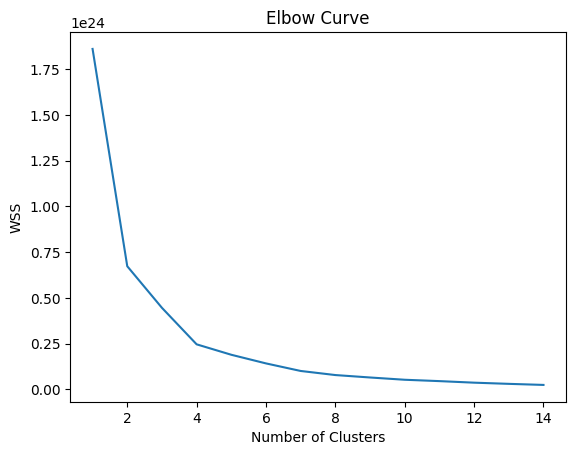

In [35]:
from sklearn.cluster import KMeans
k = range(1, 15)
wss = [] 
for i in k: 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1234,n_init=10)
    kmeans.fit(df_merge_gni_2.iloc[:,:-1]) 
    y_kmeans = kmeans.predict(df_merge_gni_2.iloc[:,:-1])
    centers = kmeans.cluster_centers_
    wss.append(kmeans.inertia_ )
# Visualize
plt.plot(k,wss)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow Curve')
plt.show()

After fitting a preliminary K-Means clustering model on the two features selected, we get the optimum number of clusters as 6

### Going forward, what are the current biggest problems you’re facing?

1. Elaborating on what was mentioned in the inital insight, after merging of the datasets of all the features of GDP (on Country and Year), data loss is seen. Moving ahead, this will pose a problem for our Regression model for GDP, as the model will have less data to train on. 
2. Furthermore, on merging the GNI factors(FDI inflow and outflow) with all the GDP indepdent variables, the number of samples returned are low and significant skew in the labels in the dataset is also seen.

### Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

Currently, the project is on schedule as it was projected. 

### Given your initial exploration of the data, is it worth proceeding with your project, and why? If not, how are you going to change your project and why do you think it’s better than your current results?

After data gathering, cleaning, EDA and model results we feel that the project is worth proceeding. 
But as highlighted in the previous reflections, we have redirected our project and research question a little according to the insights from the inital exploration of our Hypothesis. 
We changed course and are now predicting the income classes each country for Hypothesis 3 instead of Development status.

## Next Steps

### What do you plan to accomplish in the next month and how do you plan to evaluate whether your project achieved the goals you set for it?

As discussed before, we have built preliminary models for Hyp 1 and 3. We will try a few more models and compare the models to choose the best working model based on the evaluation metrics. 
Out of the models specified for the Time series Analysis we will choose the appropriate model for our Hypothesis. We can also create the model for each and analyse on the basis of the reported results.
After concluding on the technique, we will build the final model for Hypothesis 2 and 4.
For clustering in Hypothesis 4, we will settle on best value of clusters using the Elbow method.

For Hyp 1, we will check the feature importances and identify the features with highest weightage and compare with the varibales used in the formula of GDP.
For Hyp 2, we will check the R2 score for checking the strength of the model built and whether if it is a good model for our goal of Forecasting GDP.
In Hyp 3, we can check the Classification report for the metrics of the final model, and evaluate the the model to see how well it achieves our goal of classifying the countries into income classes.

#### Alternative model for GNI

Here we are demonstrating different features which we could use to develop the GNI dataset, at the same time not lose much information, which could then be used to develop a classifying model.

In [36]:
dfs = [df_fi,df_gni]
df_merge_gni_3 = pd.merge(df_gfcf,df_hspend,how='outer',on=['LOCATION','TIME'])
for d in dfs:
    df_merge_gni_3 = pd.merge(df_merge_gni_3,d,how='outer',on=['LOCATION','TIME'])
# df_merge_gni_3 = pd.merge(df_fi,df_gdp,how='outer',on=['LOCATION','TIME'])
# df_merge_gni_3 = pd.merge(df_merge_gni_3,df_gni,how='outer',on=['LOCATION','TIME'])
df_gni_3_shape_before = df_merge_gni_3.shape
print("Shape of GNI Dataset Before Cleaning:",df_gni_3_shape_before)
df_merge_gni_3 = df_merge_gni_3.dropna()
# df_merge_gni_3 = df_merge_gni_3.drop(columns=['LOCATION','TIME','H_Spend',"Investment","Trade_Goverment"])
df_merge_gni_3 = df_merge_gni_3.drop(columns=['LOCATION','TIME']).reset_index(drop=True)
print("Shape of GNI Dataset:",df_merge_gni_3.shape)
print("Data Loss:", DataLoss(df_gni_3_shape_before, df_merge_gni_3.shape))
print(df_merge_gni_3.head())
# Categorical Data Description
print(df_merge_gni_3['GNI'].value_counts())

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
model = ExtraTreesClassifier()
X = df_merge_gni_3.drop(columns=["GNI"])
Y = df_merge_gni_3['GNI'].to_numpy()
scaler = MinMaxScaler()
# X = X.iloc[:,:3]
X_norm = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X_norm,Y,test_size=0.25)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
# print(confusion_matrix(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred,labels=df_merge_gni_3['GNI'].unique()))
print(df_merge_gni_3['GNI'].unique())


Shape of GNI Dataset Before Cleaning: (10306, 6)
Shape of GNI Dataset: (1298, 4)
Data Loss: (9008, 2)
   Investment        H_Spend  Foreign_Income GNI
0   72484.821  137662.806790   -3.437004e+09   H
1   81271.683  149366.901166   -4.375000e+09   H
2   82948.542  162749.855492   -8.171159e+09   H
3   74785.917  169853.765646   -1.084648e+10   H
4   71752.851  177805.033539   -1.309395e+10   H
H     902
UM    263
LM    108
L      25
Name: GNI, dtype: int64
0.8123076923076923
[[199   3   8   1]
 [  7  15   3   0]
 [ 33   6  45   0]
 [  0   0   0   5]]
['H' 'LM' 'UM' 'L']


## References

https://www.investopedia.com/articles/investing/051415/how-calculate-gdp-country.asp

https://www.britannica.com/money/gross-national-income

#### Data Sources:
1. Share Prices: https://data.oecd.org/price/share-prices.htm
2. CPI: https://data.oecd.org/price/inflation-cpi.htm#indicator-chart
3. Long Term Interest Rates: https://data.oecd.org/interest/long-term-interest-rates.htm
4. Labour Force: https://data.oecd.org/emp/labour-force.htm
5. Trade: https://data.oecd.org/trade/trade-in-goods-and-services.htm
6. Household Spending: https://data.oecd.org/hha/household-spending.htm
7. Government Spending: https://data.oecd.org/gga/general-government-spending.htm
8. Tax Revenue: https://data.oecd.org/tax/tax-revenue.htm
9. Investment GFCF: https://data.oecd.org/gdp/investment-by-sector.htm
10. GDP: https://data.oecd.org/gdp/gross-domestic-product-gdp.htm
11. Economic Category: https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups
10. Net Primary Income from Aborad: https://data.worldbank.org/indicator/NY.GSR.NFCY.CD 